In [170]:
# - *- coding: utf- 8 - *-


In [171]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import spacy
from langdetect import detect
import langdetect

In [172]:
df = pd.read_excel('C:/Users/Donia Ksiaa/Desktop/projet/DATASETS/Youtube/CommentsOrange.xlsx' )
df2 = pd.read_excel('C:/Users/Donia Ksiaa/Desktop/projet/DATASETS/Youtube/videos.xlsx' )

In [173]:
df.describe()

,Unnamed: 0,id,likeCount,totalReplyCount
count,100.000000,111.000000,111.000000,111.000000
mean,9.580000,47.369369,1.441441,0.468468
std,9.668422,32.881586,2.894147,1.249144
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,29.500000,0.000000,0.000000
50%,6.000000,45.000000,0.000000,0.000000
75%,16.250000,59.000000,2.000000,0.000000
max,34.000000,164.000000,17.000000,7.000000


In [174]:
df.shape


(111, 7)

In [175]:
df.info

<bound method DataFrame.info of      Unnamed: 0  id      videoId  \
0           0.0   0  zOVqREDfams   
1           1.0   1  zOVqREDfams   
2           2.0   2  zOVqREDfams   
3           3.0   3  zOVqREDfams   
4           4.0   4  zOVqREDfams   
..          ...  ..          ...   
106        30.0  64  wmfBKg0uN7E   
107        31.0  65  wmfBKg0uN7E   
108        32.0  66  wmfBKg0uN7E   
109        33.0  67  wmfBKg0uN7E   
110        34.0  68  wmfBKg0uN7E   

                                                  text  likeCount  \
0        shnowa ismha elghneya, te3 shkoun ?? lien svp          9   
1                              نحيوهالي الغناية خييييه          0   
2               Marnas raw ye7shi fyh zeyd t7ello lien          1   
3                    الغناية خدمتها اورونج زايد تلوجوا          1   
4                                   issm el 4oneya svp          0   
..                                                 ...        ...   
106                                      First comma

## For a better visualization, we will be displaying pies 

In [176]:
# Pie chart
def Pie(column) : 
    #colors
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
    fig1, ax1 = plt.subplots()
    ax1.pie(column.value_counts(), colors = colors, labels=column.value_counts().index.tolist())
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()


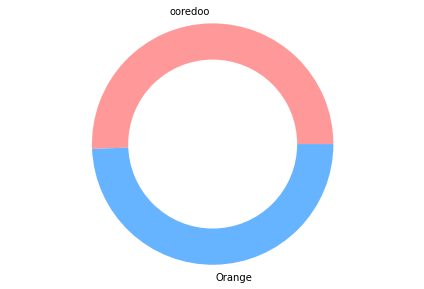

In [177]:
Pie(df2['Operator'])

## There is as much Oreedoo's videos scrapped as the Orange

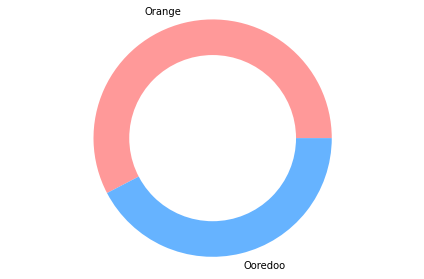

In [178]:
Pie(df['Operators'])

### There is as much Orange's Comments scrapped as the Ooredoo

In [179]:
Comment_col=df['text']
Comment_col
arr=[]
for i in Comment_col : 
    arr.append(i)
arr
    

['shnowa ismha elghneya, te3 shkoun ?? lien svp',
 'نحيوهالي الغناية خييييه',
 'Marnas raw ye7shi fyh zeyd t7ello lien',
 'الغناية خدمتها اورونج زايد تلوجوا',
 'issm el 4oneya svp',
 'Exellent idee 3jbtni 3l55r',
 'svp chkoun ya3ref leghneya 😍',
 'A3touna asem la chanson SVP trop belle',
 'Masab yatl3o y7ebo b3athhom bersmi',
 "belehi chesmha l ghoneya :'(\nt3ebt wena nlawej haha",
 'إسم الأغنية من فضلك',
 "Une belle chanson qui s'est la chanteuse Ya ghrami",
 'Le8neya moch mawjouda 5aterha 3amletha orange spécialement l offre ghrami moch 5dhetha men ghneya o5ra.',
 'chesmha ettofla',
 'Belle chonson',
 'الإعلان دا جامد',
 'meilleure pub orange bravo!!!!',
 "Cette publicité redonne l'importance au consommateur qui devient très avertis. Bravo Orange. La concurrence n'a pu interpréter qu'une unique facette du spot. C'est triste de la part des professionnels de la communication.",
 'Please the name of the song',
 'Song ????',
 'nom de song',
 'chnya ismha 8onaya',
 'اعطيني اسم الغني لخرا'

## In the next step, we will be figuring out the language of each comment and visualize the frequency of each one 

In [187]:
d = []
d2=[]

for comment in arr: 
    try:
        dell = detect(comment) 
        if  dell != 'fr' :
            dell = 'tn'
    
    except:
        result = 'unknown'
    
    finally:
        d2.append(
        {
            'Comment': comment,
            'Language': dell
        }
    )


In [190]:
d2
c=pd.DataFrame(d2)
c

,Comment,Language
0,"shnowa ismha elghneya, te3 shkoun ?? lien svp",tn
1,نحيوهالي الغناية خييييه,tn
2,Marnas raw ye7shi fyh zeyd t7ello lien,tn
3,الغناية خدمتها اورونج زايد تلوجوا,tn
4,issm el 4oneya svp,tn
...,...,...
106,First commant,tn
107,احسن pub في تاريخ ooredoo,tn
108,خلعة ولا تكسير ضلعة آآ ممَا؟,tn
109,What's that song ?,tn


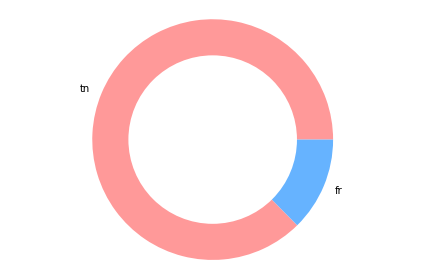

In [189]:
Pie(c['Language'])

### Note : The Tunisian Dialect is the most used in comments : we need to do a cloud word because the tunisian Dialect is untranslatable


## WORD CLOUDS : Ooredoo's and Orange's

### Starting with deviding the Dataset 

In [210]:
Orange = []
Ooredoo = []
for i in df.index : 
    
    if df['Operators'][i] == 'Orange' :
        Orange.append(df['text'][i])
    else :
        Ooredoo.append(df['text'])
Orange


['shnowa ismha elghneya, te3 shkoun ?? lien svp',
 'نحيوهالي الغناية خييييه',
 'Marnas raw ye7shi fyh zeyd t7ello lien',
 'الغناية خدمتها اورونج زايد تلوجوا',
 'issm el 4oneya svp',
 'Exellent idee 3jbtni 3l55r',
 'svp chkoun ya3ref leghneya 😍',
 'A3touna asem la chanson SVP trop belle',
 'Masab yatl3o y7ebo b3athhom bersmi',
 "belehi chesmha l ghoneya :'(\nt3ebt wena nlawej haha",
 'إسم الأغنية من فضلك',
 "Une belle chanson qui s'est la chanteuse Ya ghrami",
 'Le8neya moch mawjouda 5aterha 3amletha orange spécialement l offre ghrami moch 5dhetha men ghneya o5ra.',
 'chesmha ettofla',
 'Belle chonson',
 'الإعلان دا جامد',
 'meilleure pub orange bravo!!!!',
 "Cette publicité redonne l'importance au consommateur qui devient très avertis. Bravo Orange. La concurrence n'a pu interpréter qu'une unique facette du spot. C'est triste de la part des professionnels de la communication.",
 'Please the name of the song',
 'Song ????',
 'nom de song',
 'chnya ismha 8onaya',
 'اعطيني اسم الغني لخرا'

## Orange's word cloud

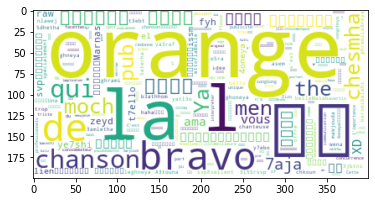

In [211]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import numpy as np #to get the color of our image

#Content-related
stopwords = set(STOPWORDS)
mot= ''
mot = ''.join(map(str,Orange))
stop_words = ["ismha", "elghneya", "shnowa","te3","lien","svp","shkoun"]

#Appearance-related
wc = WordCloud(background_color = 'white',
               stopwords = stop_words,
               contour_width = 3,
               contour_color = 'black')

cloud=wc.generate(mot)



#Plotting
##plt.imshow(wc, interpolation = 'bilinear')
##plt.axis('off')
##plt.show()

wc.to_file('Batman_wordcloud.png')
plt.imshow(cloud,interpolation='bilinear')

### We can constat that the most used word in the orange comments is 'Bravo' which refers to the subscribers satisfaction

## Ooredoo's word cloud

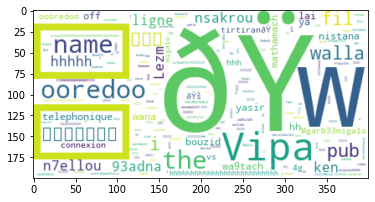

In [215]:
mot= ''
mot = ''.join(map(str,Ooredoo))
stop_words = ["fi", "la", "shnowa","te3","lien","svp","shkoun"]

#Appearance-related
wc = WordCloud(background_color = 'white',
               stopwords = stop_words,
               contour_width = 3,
               contour_color = 'black')

cloud=wc.generate(mot)



#Plotting
##plt.imshow(wc, interpolation = 'bilinear')
##plt.axis('off')
##plt.show()

wc.to_file('Batman_wordcloud.png')
plt.imshow(cloud,interpolation='bilinear')

### for the ooredoo comments : ðŸ˜ is the encoding of the love emoji 😍 which project the satisfaction of the customers 

# ----------

# The comment's replies

In [216]:
df = pd.read_excel('C:/Users/Donia Ksiaa/Desktop/projet/DATASETS/Youtube/CommentsOrange.xlsx' )
